<a href="https://colab.research.google.com/github/hyunchangyi/python101/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# define dataset
X, y = make_classification(n_samples=15, n_features=5, n_informative=3, n_redundant=2, random_state=3)

In [3]:
X, y

(array([[ 1.59856638, -1.9028913 ,  0.61708469,  1.67229209,  0.88637997],
        [ 2.04916432, -2.1297731 ,  1.56596581,  2.87905716,  2.23265182],
        [-0.84327098,  2.47988915,  1.37281465, -0.27888364,  1.09951426],
        [ 0.77409613,  0.70699889,  1.5714014 ,  0.60152771,  1.05616046],
        [-0.90093844,  0.65575703, -0.03115067,  0.04450309,  0.51745865],
        [ 1.76804898, -0.59915681,  1.37144087,  0.94827574,  0.66614997],
        [-2.00582619, -0.47822092,  0.18912706,  2.92461721,  3.656422  ],
        [-2.12389185, -2.51077515, -3.46878997,  0.29631857, -0.7547815 ],
        [-0.76157432,  0.71856839, -0.0087921 , -0.14448488,  0.2974966 ],
        [ 1.02932791,  1.50259571,  1.99078352, -0.05463238,  0.63410717],
        [ 1.66679257, -2.35919862,  0.70570966,  2.30831588,  1.43136011],
        [ 1.96998565,  1.87726868,  3.85079035,  1.21666934,  2.33427977],
        [ 0.70022348, -1.10057139,  0.31689387,  1.13778033,  0.75344025],
        [-2.41587473, -0.

In [4]:
# summarize the dataset
print(X.shape, y.shape)

(15, 5) (15,)


In [65]:
# define the model
model = RandomForestClassifier(n_estimators=20, bootstrap=False)
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
# evaluate the model
cv = KFold(n_splits=3, shuffle=False)

In [67]:
for train, test in cv.split(X, y):
    print(f"{train} {test}")

[ 5  6  7  8  9 10 11 12 13 14] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14] [5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14]


In [68]:
# evaluate the model
cv = KFold(n_splits=3, shuffle=True, random_state=1)

In [69]:
for train, test in cv.split(X, y):
    print(f"{train} {test}")

[ 0  1  4  5  8  9 11 12 13 14] [ 2  3  6  7 10]
[ 2  3  5  6  7  8  9 10 11 12] [ 0  1  4 13 14]
[ 0  1  2  3  4  6  7 10 13 14] [ 5  8  9 11 12]


In [70]:
X[train], y[train]

(array([[ 1.59856638, -1.9028913 ,  0.61708469,  1.67229209,  0.88637997],
        [ 2.04916432, -2.1297731 ,  1.56596581,  2.87905716,  2.23265182],
        [-0.84327098,  2.47988915,  1.37281465, -0.27888364,  1.09951426],
        [ 0.77409613,  0.70699889,  1.5714014 ,  0.60152771,  1.05616046],
        [-0.90093844,  0.65575703, -0.03115067,  0.04450309,  0.51745865],
        [-2.00582619, -0.47822092,  0.18912706,  2.92461721,  3.656422  ],
        [-2.12389185, -2.51077515, -3.46878997,  0.29631857, -0.7547815 ],
        [ 1.66679257, -2.35919862,  0.70570966,  2.30831588,  1.43136011],
        [-2.41587473, -0.5139843 , -0.84083895,  1.89059924,  2.37987658],
        [ 0.09452107,  1.92731132,  1.39481686, -0.50467743,  0.40558501]]),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1]))

In [71]:
scores = []

for train, test in cv.split(X, y):
    model.fit(X[train], y[train])
    yhat = model.predict(X[test])
    scores.append(accuracy_score(yhat, y[test]))

In [72]:
scores

[0.6, 0.8, 0.6]

In [73]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.667 (0.094)


In [74]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.667 (0.094)


In [75]:
# fit the model on the whole dataset
model.fit(X, y)

RandomForestClassifier(bootstrap=False, n_estimators=20)

In [76]:
model.predict(X[[0]])

array([0])

In [77]:
model.predict_proba(X[[0]])

array([[1., 0.]])

In [78]:
y[0]

0

In [79]:
[tree.predict(X[[0]]) for tree in model.estimators_]

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.])]

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

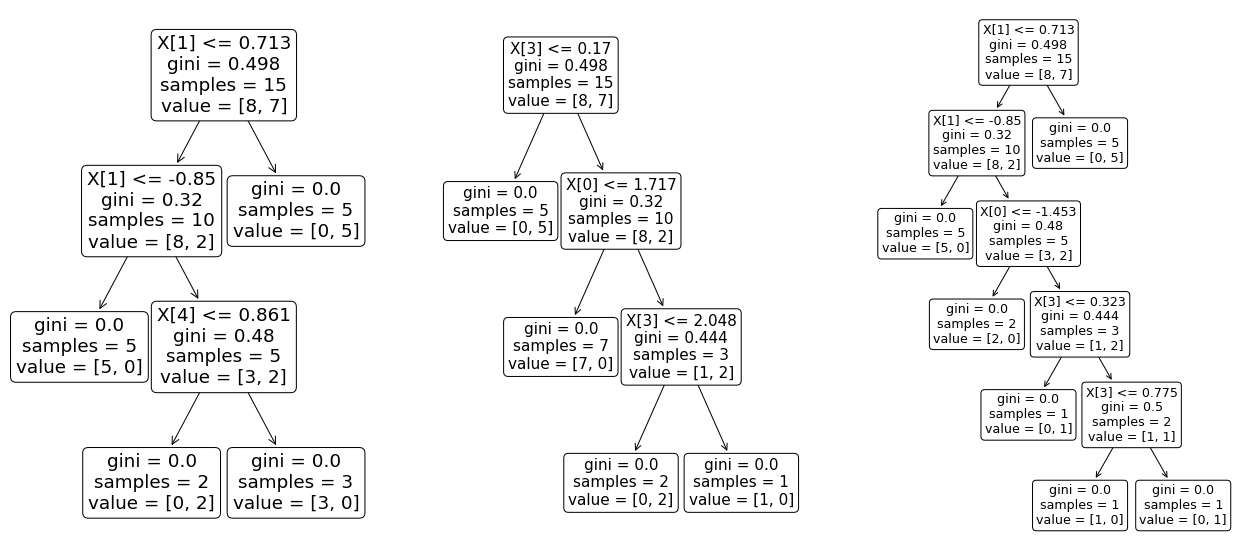

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10))
for i, a in enumerate(ax):
    plot_tree(model.estimators_[i], rounded=True, ax=a);

In [82]:
# define the model
model = RandomForestClassifier(n_estimators=20, bootstrap=True)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [83]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.163)


In [84]:
# fit the model on the whole dataset
model.fit(X, y)

RandomForestClassifier(n_estimators=20)

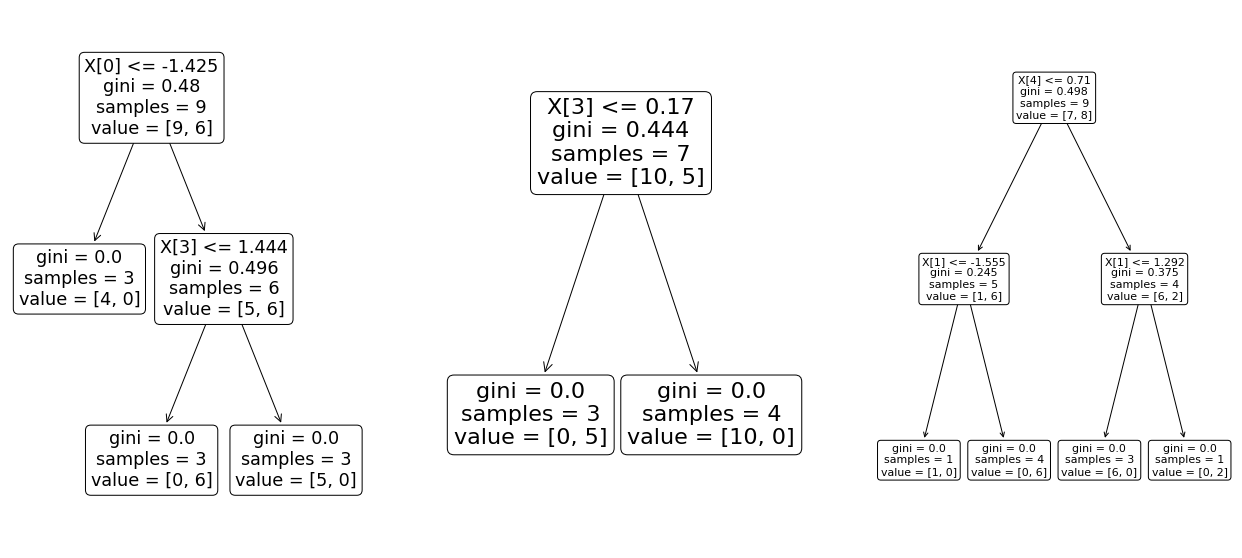

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10))
for i, a in enumerate(ax):
    plot_tree(model.estimators_[i], rounded=True, ax=a);